In [2]:
#We will import all the libraries needed to work with this dataset
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.graph_objs as go
import matplotlib.pyplot as plt
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
%matplotlib inline

In [3]:
#The dataset will be imported into a data frame called "avocado". The head of the data frame will be shown below.
avo=pd.read_csv('avocado-updated-2020.csv')
avo.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington


In [4]:
for col in avo.columns:
    print(col)

date
average_price
total_volume
4046
4225
4770
total_bags
small_bags
large_bags
xlarge_bags
type
year
geography


In [5]:
avo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30021 entries, 0 to 30020
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           30021 non-null  object 
 1   average_price  30021 non-null  float64
 2   total_volume   30021 non-null  float64
 3   4046           30021 non-null  float64
 4   4225           30021 non-null  float64
 5   4770           30021 non-null  float64
 6   total_bags     30021 non-null  float64
 7   small_bags     30021 non-null  float64
 8   large_bags     30021 non-null  float64
 9   xlarge_bags    30021 non-null  float64
 10  type           30021 non-null  object 
 11  year           30021 non-null  int64  
 12  geography      30021 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 3.0+ MB


This link shows the sizes of the avocados.
http://www.bobbywires.com/plu-1.php?S=V&L=A&V=AVOCADOS 

In [6]:
#We will be adding sizing letters to the columns 4046, 4225, and 4770 for better understanding
#using the link above as reference.
avo.rename(columns={'date':'Date',
                        '4046':'4046S',
                        '4225':'4225L',
                        '4770':'4770XL',
                        'average_price':'AvgPr',
                        'total_volume':'TVol',
                        'small_bags':'SBags',
                        'large_bags':'LBags',
                        'xlarge_bags':'XLBags',
                        'type':'Type',
                        'year':'Year',
                        'geography':'Location'},
               inplace=True)

#There will need to be another column where it shows the number of the month.
#We will use the date column as a reference.
avo['Month']=pd.DatetimeIndex(avo['Date']).month
avo['Day']=pd.DatetimeIndex(avo['Date']).day

#Display the head()
avo.head()

,Date,AvgPr,TVol,4046S,4225L,4770XL,total_bags,SBags,LBags,XLBags,Type,Year,Location,Month,Day
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,1,4
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany,1,4
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta,1,4
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta,1,4
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington,1,4


# Dropping the organic data

In [7]:
#Dropping organic because of all the null values
#focusing on conventional
#create a new data frame named Conv_Avocado by choosing the column and removing organic
Conv_Avocado=avo[avo.Type!='organic']
Org_Avocado=avo[avo.Type!='conventional']

Conv_Avocado.head()

,Date,AvgPr,TVol,4046S,4225L,4770XL,total_bags,SBags,LBags,XLBags,Type,Year,Location,Month,Day
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany,1,4
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta,1,4
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington,1,4
6,2015-01-04,1.01,80034.32,44562.12,24964.23,2752.35,7755.62,6064.30,1691.32,0.0,conventional,2015,Boise,1,4
8,2015-01-04,1.02,491738.00,7193.87,396752.18,128.82,87663.13,87406.84,256.29,0.0,conventional,2015,Boston,1,4


So now we have a data frame Conv_Avocado that has only conventional avocados.

# Clean up on isle xlarge_bags

In [8]:
#We need to drop the xlarge bags column because of all the 0 values.
Conv_Avocado=Conv_Avocado.drop(labels='XLBags',axis=1)

In [9]:
ran=Conv_Avocado.loc[Conv_Avocado['AvgPr']==0]

In [10]:
ran.head()

,Date,AvgPr,TVol,4046S,4225L,4770XL,total_bags,SBags,LBags,Type,Year,Location,Month,Day


# Making the Regions and Cities data frame
We want to separate the Regions from the Cities


In [11]:
#We will need to seperate the states and regions
#we can see here all the unique values in the avocado data frame
avo['Location'].unique()

array(['Albany', 'Atlanta', 'Baltimore/Washington', 'Boise', 'Boston',
       'Buffalo/Rochester', 'California', 'Charlotte', 'Chicago',
       'Cincinnati/Dayton', 'Columbus', 'Dallas/Ft. Worth', 'Denver',
       'Detroit', 'Grand Rapids', 'Great Lakes', 'Harrisburg/Scranton',
       'Hartford/Springfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'Las Vegas', 'Los Angeles', 'Louisville', 'Miami/Ft. Lauderdale',
       'Midsouth', 'Nashville', 'New Orleans/Mobile', 'New York',
       'Northeast', 'Northern New England', 'Orlando', 'Philadelphia',
       'Phoenix/Tucson', 'Pittsburgh', 'Plains', 'Portland',
       'Raleigh/Greensboro', 'Richmond/Norfolk', 'Roanoke', 'Sacramento',
       'San Diego', 'San Francisco', 'Seattle', 'South Carolina',
       'South Central', 'Southeast', 'Spokane', 'St. Louis', 'Syracuse',
       'Tampa', 'Total U.S.', 'West', 'West Tex/New Mexico'], dtype=object)

In [12]:
#create a list with the names of the cities
Cities=['Albany', 'Atlanta', 'Baltimore/Washington', 'Boise', 'Boston',
       'Buffalo/Rochester', 'Charlotte', 'Chicago',
       'Cincinnati/Dayton', 'Columbus', 'Dallas/Ft. Worth', 'Denver',
       'Detroit', 'Grand Rapids', 'Harrisburg/Scranton',
       'Hartford/Springfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'Las Vegas', 'Los Angeles', 'Louisville', 'Miami/Ft. Lauderdale',
       'Nashville', 'New Orleans/Mobile', 'New York',
       'Northern New England', 'Orlando', 'Philadelphia',
       'Phoenix/Tucson', 'Pittsburgh', 'Portland',
       'Raleigh/Greensboro', 'Richmond/Norfolk', 'Roanoke', 'Sacramento',
       'San Diego', 'San Francisco', 'Seattle', 'South Carolina',
       'Spokane', 'St. Louis', 'Syracuse',
       'Tampa','West Tex/New Mexico']

#create a data frame with only the cities using the Cities list that was created. 
Citiesdf=Conv_Avocado.loc[avo['Location'].isin(Cities)]

#display the unique values within the geography coluumn
Citiesdf['Location'].unique()

array(['Albany', 'Atlanta', 'Baltimore/Washington', 'Boise', 'Boston',
       'Buffalo/Rochester', 'Charlotte', 'Chicago', 'Cincinnati/Dayton',
       'Columbus', 'Dallas/Ft. Worth', 'Denver', 'Detroit',
       'Grand Rapids', 'Harrisburg/Scranton', 'Hartford/Springfield',
       'Houston', 'Indianapolis', 'Jacksonville', 'Las Vegas',
       'Los Angeles', 'Louisville', 'Miami/Ft. Lauderdale', 'Nashville',
       'New Orleans/Mobile', 'New York', 'Northern New England',
       'Orlando', 'Philadelphia', 'Phoenix/Tucson', 'Pittsburgh',
       'Portland', 'Raleigh/Greensboro', 'Richmond/Norfolk', 'Roanoke',
       'Sacramento', 'San Diego', 'San Francisco', 'Seattle',
       'South Carolina', 'Spokane', 'St. Louis', 'Syracuse', 'Tampa',
       'West Tex/New Mexico'], dtype=object)

In [13]:
#Create a list with the names of the regions. We will use it to seperate them from the cities.
Regions=['California','Great Lakes','Midsouth',
         'Northeast','Plains','South Central','Southeast','West']

#Create a dataframe with only the regions using the list that was created.
Regionsdf=Conv_Avocado.loc[avo['Location'].isin(Regions)]

#Display the unique values within the geography column.
Regionsdf['Location'].unique()                   

array(['California', 'Great Lakes', 'Midsouth', 'Northeast', 'Plains',
       'South Central', 'Southeast', 'West'], dtype=object)

The only value that was dropped from the original data frame was the 'total U.S.' because it is the total of the regions.

In [79]:
#Make dataframes based on the year so we can call different years throughout the notebook
#There will be regions and cities 
Conv_2015_CT=Citiesdf.loc[Citiesdf['Year']==2015]
Conv_2016_CT=Citiesdf.loc[Citiesdf['Year']==2016]
Conv_2017_CT=Citiesdf.loc[Citiesdf['Year']==2017]
Conv_2018_CT=Citiesdf.loc[Citiesdf['Year']==2018]
Conv_2019_CT=Citiesdf.loc[Citiesdf['Year']==2019]
Conv_2020_CT=Citiesdf.loc[Citiesdf['Year']==2020]

#need to reset the index for the new data frames
Conv_2015_CT.reset_index(inplace=True)
Conv_2016_CT.reset_index(inplace=True)
Conv_2017_CT.reset_index(inplace=True)
Conv_2018_CT.reset_index(inplace=True)
Conv_2019_CT.reset_index(inplace=True)
Conv_2020_CT.reset_index(inplace=True)

Conv_2015_RG=Regionsdf.loc[Regionsdf['Year']==2015]
Conv_2016_RG=Regionsdf.loc[Regionsdf['Year']==2016]
Conv_2017_RG=Regionsdf.loc[Regionsdf['Year']==2017]
Conv_2018_RG=Regionsdf.loc[Regionsdf['Year']==2018]
Conv_2019_RG=Regionsdf.loc[Regionsdf['Year']==2019]
Conv_2020_RG=Regionsdf.loc[Regionsdf['Year']==2020]

#need to reset the index for the new data frames
Conv_2015_RG.reset_index(inplace=True)
Conv_2016_RG.reset_index(inplace=True)
Conv_2017_RG.reset_index(inplace=True)
Conv_2018_RG.reset_index(inplace=True)
Conv_2019_RG.reset_index(inplace=True)
Conv_2020_RG.reset_index(inplace=True)

In [71]:
print(Conv_2015_RG['AvgPr'].count())
print(Conv_2016_RG['AvgPr'].count())
print(Conv_2017_RG['AvgPr'].count())
print(Conv_2018_RG['AvgPr'].count())
print(Conv_2019_RG['AvgPr'].count())
print(Conv_2020_RG['AvgPr'].count())

416
416
424
392
416
160


# Lets create a Barplot that can show the sales based on Months of 2015

Month
1     3309989.94
2     3902247.94
3     4653819.07
4     3586287.16
5     4743712.75
6     4602052.69
7     4494882.78
8     5112224.97
9     4423144.90
10    5231697.94
11    4905455.55
12    4333353.91
Name: 4770XL, dtype: float64

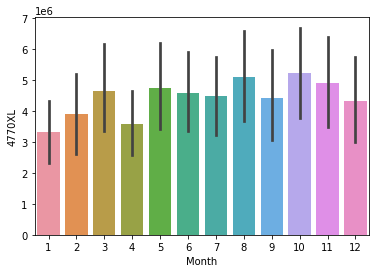

In [16]:

#lets create the barplot using Conv_2015 data
sns.barplot(data=Conv_2015_RG,
           x='Month',
           y='4770XL',
           estimator=sum)

#lets show the values that can go with the bar plot for reference
Conv_2015_RG.groupby('Month')['4770XL'].sum()

The barplot above shows the sum of 4770XL by month for the year 2015.

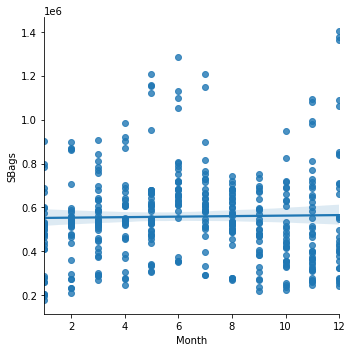

In [17]:
sns.lmplot(data=Conv_2015_RG,
          x='Month',
          y='SBags',
          palette='seismic')

ValueError: x and y must have same first dimension, but have shapes (1,) and (416,)

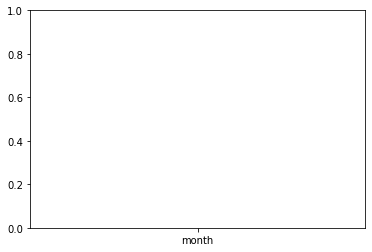

In [18]:
plt.plot('month','4770XL',
        data=Conv_2015_RG)

In [ ]:
Conv_2015_RG.plot.scatter(x='month',
                      y='average_price')

What if you can plot the different prices in the regions???
will the price be sorted from smallest to largest listing all of the regions or cites?
would we have to create another column with the combining the the dates instead of the month

# Making an ECDF for 4770xl??

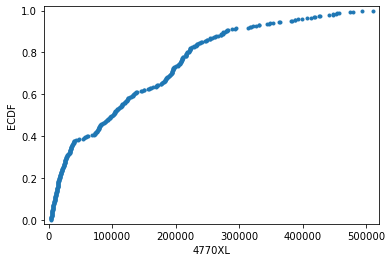

In [19]:
#lets create an ECDF for the amount of 4770XL sold in 2015
#we will create a variable x with the totals sorted
x=np.sort(Conv_2015_RG['4770XL'])

#lets get the length of x ('average price')
n=len(x)

#lets create a range to use as the y axis using the length of average price and dividing by it
y=np.arange(1,n+1)/n


#Create a plot
XLE=plt.plot(x,y, 
           marker='.',
           linestyle='none',)


#Rename the axis y and x
XLE=plt.xlabel('4770XL')
XLE=plt.ylabel('ECDF')

#add extra space to the edges
plt.margins(0.02)

The above plot shows percentages based on the amount of 4770XL avocados sold by regions in 2015

# Making an ECDF Function

In [20]:
def ecdf(data):
    n=len(data)
    x=np.sort(data)
    y=np.arange(1,n+1)/n
    return x,y

# 2015, 2016, 2017 Average Price Percantages

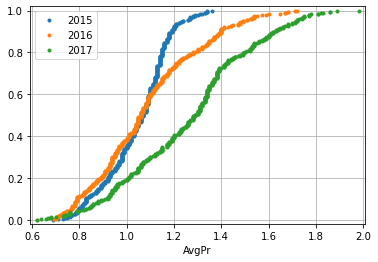

In [21]:
#lets call the ecdf function we created to get the x and y calculations to plot the average price for regions.
x15_price, y15_price=ecdf(Conv_2015_RG['AvgPr'])
x16_price, y16_price=ecdf(Conv_2016_RG['AvgPr'])
x17_price, y17_price=ecdf(Conv_2017_RG['AvgPr'])


#lets use the x and y value to create the plot.
AvgPrReg1=plt.plot(x15_price, y15_price,marker='.',linestyle='none')
AvgPrReg1=plt.plot(x16_price, y16_price,marker='.',linestyle='none')
AvgPrReg1=plt.plot(x17_price, y17_price,marker='.',linestyle='none')

AvgPrReg1=plt.legend(('2015','2016','2017'))
AvgPrReg1=plt.xlabel('AvgPr')
AvgPrReg1=plt.margins(.02)
AvgPrReg1=plt.grid()


plt.show()

In [22]:
print('The max average price for 2015: $',Conv_2015_RG['AvgPr'].max())
print('The max average price for 2016: $',Conv_2016_RG['AvgPr'].max())
print('The max average price for 2017: $',Conv_2017_RG['AvgPr'].max())

The max average price for 2015: $ 1.36
The max average price for 2016: $ 1.72
The max average price for 2017: $ 1.98


# 2018, 2019, 2020 Average Price Percantages

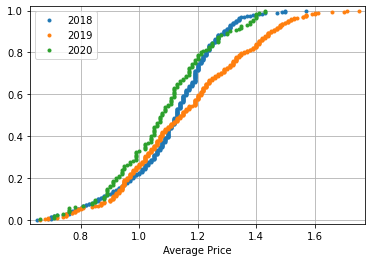

In [23]:
#lets call the ecdf function to calculate the percantages for 2018, 2019 and 2020
x18_price, y18_price=ecdf(Conv_2018_RG['AvgPr'])
x19_price, y19_price=ecdf(Conv_2019_RG['AvgPr'])
x20_price, y20_price=ecdf(Conv_2020_RG['AvgPr'])

#lets use the x and y values to plot the average prices
AvgPrReg2=plt.plot(x18_price, y18_price, marker='.', linestyle='none')
AvgPrReg2=plt.plot(x19_price, y19_price, marker='.', linestyle='none')
AvgPrReg2=plt.plot(x20_price, y20_price, marker='.', linestyle='none')

#Show the legend
AvgPrReg2=plt.legend(('2018','2019','2020'))
AvgPrReg2=plt.xlabel('Average Price')
AvgPrReg2=plt.margins(0.02)
AvgPrReg2=plt.grid()

plt.show()

In [24]:
print('The max average price for 2018: $',Conv_2018_RG['AvgPr'].max())
print('The max average price for 2019: $',Conv_2019_RG['AvgPr'].max())
print('The max average price for 2020: $',Conv_2020_RG['AvgPr'].max())

The max average price for 2018: $ 1.57
The max average price for 2019: $ 1.75
The max average price for 2020: $ 1.43


# Some 3d Stuff??

In [25]:
from plotly import __version__
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

In [62]:
print(Conv_2017_RG['AvgPr'].count())
print(Conv_2018_RG['AvgPr'].count())
print(Conv_2020_RG['AvgPr'].count())

print(Conv_2016_RG['AvgPr'].count())

424
392
160
416


In [27]:
Conv_Avg_Pr={'2015':Conv_2015_RG['AvgPr'],
             '2016':Conv_2016_RG['AvgPr'],
             '2017':Conv_2017_RG['AvgPr'],
             '2018':Conv_2018_RG['AvgPr'],
             '2019':Conv_2019_RG['AvgPr'],
             '2020':Conv_2020_RG['AvgPr']}
Test=pd.DataFrame(data=Conv_Avg_Pr)
Test.head()

,2015,2016,2017,2018,2019,2020
12,0.93,NaN,NaN,NaN,NaN,NaN
30,1.02,NaN,NaN,NaN,NaN,NaN
50,1.10,NaN,NaN,NaN,NaN,NaN
58,1.09,NaN,NaN,NaN,NaN,NaN
70,1.01,NaN,NaN,NaN,NaN,NaN


In [64]:
Yr_Avrg_Pr=pd.concat([Conv_2015_RG['AvgPr'],
               Conv_2016_RG['AvgPr'],
               Conv_2017_RG['AvgPr'],
               Conv_2018_RG['AvgPr'],
               Conv_2019_RG['AvgPr'],
               Conv_2020_RG['AvgPr']],
               axis=1,
               ignore_index=True)
Yr_Avrg_Pr.rename(columns={'0':'2015',
                           '1':'2016',
                           '2':'2017',
                           '3':'2018',
                           '4':'2019'})
dfg.head()

,0,1,2,3,4,5
0,0.93,0.73,0.89,0.93,1.06,1.12
1,1.02,0.92,0.88,0.92,1.00,0.89
2,1.10,1.01,1.12,0.96,1.07,0.97
3,1.09,1.07,1.35,1.31,1.27,1.20
4,1.01,0.94,0.83,1.02,1.08,0.99


In [61]:
Conv_2016_RG.head(10)

,index,Date,AvgPr,TVol,4046S,4225L,4770XL,total_bags,SBags,LBags,Type,Year,Location,Month,Day
0,5627,2016-01-03,0.73,7730431.28,2315175.35,2856102.41,257268.16,2301885.36,1950428.50,340852.13,conventional,2016,California,1,3
1,5645,2016-01-03,0.92,4065583.41,604697.28,2200074.78,543717.88,717093.47,438279.98,147920.69,conventional,2016,Great Lakes,1,3
2,5665,2016-01-03,1.01,2967929.65,675102.33,1566127.03,150716.62,575983.67,504610.53,64629.99,conventional,2016,Midsouth,1,3
3,5673,2016-01-03,1.07,4524219.73,96146.84,3588931.66,53765.74,785375.49,731458.46,52073.39,conventional,2016,Northeast,1,3
4,5685,2016-01-03,0.94,2171818.57,999388.89,840637.85,19331.34,312460.49,291734.88,19418.04,conventional,2016,Plains,1,3
5,5705,2016-01-03,0.79,5693942.07,2512692.22,2024262.18,361423.55,795564.12,682311.74,109448.15,conventional,2016,South Central,1,3
6,5707,2016-01-03,1.06,3280451.38,2208431.81,339054.70,17650.77,715314.10,482358.65,232943.41,conventional,2016,Southeast,1,3
7,5719,2016-01-03,0.73,7707711.90,2204871.45,2638893.24,156194.56,2707752.65,1383713.06,1320163.95,conventional,2016,West,1,3
8,5735,2016-01-10,0.87,6303406.82,1736168.01,2173554.18,261931.07,2131753.56,1793640.16,321613.97,conventional,2016,California,1,10
9,5753,2016-01-10,1.06,3310201.06,503914.83,1753942.06,352247.15,700097.02,488806.30,185907.38,conventional,2016,Great Lakes,1,10


In [53]:
data=[Conv_2015_RG['AvgPr'],Conv_2016_RG['AvgPr']]
header =['2015','2016']
dfe=pd.merge(Conv_2015_RG['AvgPr'],Conv_2016_RG['AvgPr'],how='outer',)

dfe.head()

,AvgPr
0,0.93
1,0.93
2,0.93
3,0.93
4,0.93


In [42]:
Conv_2015_RG[['4046S','4770XL']].iplot(kind='spread')

In [92]:
df3d=Conv_2016_RG[['Month','AvgPr','4770XL']]

In [93]:
df3d.count()

Month     416
AvgPr     416
4770XL    416
dtype: int64

In [94]:
df3d.iplot(kind='surface',colorscale='rdylbu',text=Conv_2015_RG['Location'])

This plot can go with the ecdf

In [39]:
Conv_2015_RG[['4225L','4770XL','4046S']].iplot()

# Ignore this part for now
Now that we have the regions seperated, we can make calculations based on the regions.

#Create a data frame with regions only from the year 2015 and type conventional
Regions2015conv=Regionsdf.loc[((Regionsdf['year']==2015)&(Regionsdf['type']=='conventional'))]

#create a data frame with regions only from the year 2015 and type organic
Regions2015org=Regionsdf.loc[((Regionsdf['year']==2015)&(Regionsdf['type']=='organic'))]

#Print the sum for conventional and organic avocados in 2015.
print('Extra Large Bags Conventional Avocados 2015: ',Regions2015conv['xlarge_bags'].mean())
print('Extra Large Bags Organic Avocados 2015: ',Regions2015org['xlarge_bags'].mean())

#Isolate the sales in the year of 2015
Regions2015=Regionsdf.loc[Regionsdf['year']==2015]

#A barplot that will show the sum of the of xlarge bags of conventional sold in a month for the year 2015.
sns.barplot(data=Regions2015,
           x='month',
           y='xlarge_bags',
            hue='type',
           palette='Blues_d')

The barplot above shows us the average sales for extra large avocado bags in 2015. It looks like the most sales where in the month of December for 2015.

sns.violinplot(data=Regions2015,
              x='type',
              y='month')

df1415=Regions2015conv.loc[Regions2015conv['date']=='2015-01-04']

df1415['small_bags'].sum()

# lets try to look at it before it we added the average to the columns.

In [228]:
avocado_original=pd.read_csv('avocado-updated-2020.csv')
avocado_original.head()

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.0,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.0,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.0,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.0,conventional,2015,Baltimore/Washington


In [229]:
totalus_orig=avocado_original.loc[avocado['geography']=='Total U.S.']

In [231]:
origWOtotalus=avocado_original.loc[avocado['geography']!='Total U.S.']

In [234]:
df1=origWOtotalus.loc[origWOtotalus['date']=='2015-01-04']

In [235]:
df1['xlarge_bags'].sum()

31883.78

# Looking at dates

In [189]:
avocado['date'].unique()

array(['2015-01-04', '2015-01-11', '2015-01-18', '2015-01-25',
       '2015-02-01', '2015-02-08', '2015-02-15', '2015-02-22',
       '2015-03-01', '2015-03-08', '2015-03-15', '2015-03-22',
       '2015-03-29', '2015-04-05', '2015-04-12', '2015-04-19',
       '2015-04-26', '2015-05-03', '2015-05-10', '2015-05-17',
       '2015-05-24', '2015-05-31', '2015-06-07', '2015-06-14',
       '2015-06-21', '2015-06-28', '2015-07-05', '2015-07-12',
       '2015-07-19', '2015-07-26', '2015-08-02', '2015-08-09',
       '2015-08-16', '2015-08-23', '2015-08-30', '2015-09-06',
       '2015-09-13', '2015-09-20', '2015-09-27', '2015-10-04',
       '2015-10-11', '2015-10-18', '2015-10-25', '2015-11-01',
       '2015-11-08', '2015-11-15', '2015-11-22', '2015-11-29',
       '2015-12-06', '2015-12-13', '2015-12-20', '2015-12-27',
       '2016-01-03', '2016-01-10', '2016-01-17', '2016-01-24',
       '2016-01-31', '2016-02-07', '2016-02-14', '2016-02-21',
       '2016-02-28', '2016-03-06', '2016-03-13', '2016-

# looking at 2015

In [190]:
#We will be looking at the year 2015 by using the loc function and setting to the variable year_2015.
#We also want to know the count, sum and mean for 2015.
year_2015=avocado.loc[avocado['year']==2015]

print('There are a total of ',year_2015['xlarge_bags'].count(),' entries in 2015.')
print('There were ',year_2015['xlarge_bags'].sum(),' bags that were sold in 2015.')
print('The average bags that were sold in 2015 is ',year_2015['xlarge_bags'].mean(),'.')

There are a total of  5615  entries in 2015.
There were  32101248.55771365  bags that were sold in 2015.
The average bags that were sold in 2015 is  5717.052280981915 .


Looking at the numbers above, we can determine that there were 5,615 total entries in 2015 for extra large bags containing conventional and organic avocados. When we sum the bags that were sold, we get 32,101,248.56 bags sold with an average of 5,717.05.

In [191]:
#We will now seperate conventional and organic avocados in the year 2015 into their own data frame.
organic2015=year_2015.loc[year_2015['type']=='organic']
conventional2015=year_2015.loc[year_2015['type']=='conventional']

# Lets look at the dates from 2015

In [192]:
year_2015['date'].unique()

array(['2015-01-04', '2015-01-11', '2015-01-18', '2015-01-25',
       '2015-02-01', '2015-02-08', '2015-02-15', '2015-02-22',
       '2015-03-01', '2015-03-08', '2015-03-15', '2015-03-22',
       '2015-03-29', '2015-04-05', '2015-04-12', '2015-04-19',
       '2015-04-26', '2015-05-03', '2015-05-10', '2015-05-17',
       '2015-05-24', '2015-05-31', '2015-06-07', '2015-06-14',
       '2015-06-21', '2015-06-28', '2015-07-05', '2015-07-12',
       '2015-07-19', '2015-07-26', '2015-08-02', '2015-08-09',
       '2015-08-16', '2015-08-23', '2015-08-30', '2015-09-06',
       '2015-09-13', '2015-09-20', '2015-09-27', '2015-10-04',
       '2015-10-11', '2015-10-18', '2015-10-25', '2015-11-01',
       '2015-11-08', '2015-11-15', '2015-11-22', '2015-11-29',
       '2015-12-06', '2015-12-13', '2015-12-20', '2015-12-27'],
      dtype=object)

In [193]:
#We want to get the month from the date so that we can plot the sum of xlarge_bags per month.
#The line below will make a new column named 'month' and extract the month number from the date.

avocado['month']=pd.DatetimeIndex(avocado['date']).month

In [194]:
#this data frame was made as dummy to practice with the barplot.
year_2015_date=avocado.loc[avocado['year']==2015]

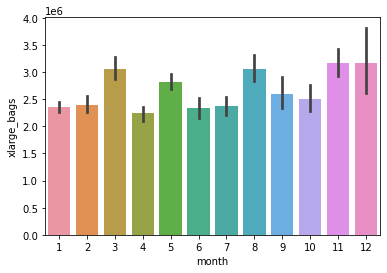

In [197]:
sns.barplot(x='month',y='xlarge_bags', data=year_2015_date,estimator=sum)

In [196]:
year_2015_date['xlarge_bags'].sum()

32101248.55771365

# The numbers do not match!!

In [150]:
#Lets try to see some info for both conventional and organic.
organic2015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2807 entries, 1 to 5614
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           2807 non-null   object 
 1   average_price  2807 non-null   float64
 2   total_volume   2807 non-null   float64
 3   4046S          2807 non-null   float64
 4   4225L          2807 non-null   float64
 5   4770XL         2807 non-null   float64
 6   total_bags     2807 non-null   float64
 7   small_bags     2807 non-null   float64
 8   large_bags     2807 non-null   float64
 9   xlarge_bags    2807 non-null   float64
 10  type           2807 non-null   object 
 11  year           2807 non-null   int64  
 12  geography      2807 non-null   object 
dtypes: float64(9), int64(1), object(3)
memory usage: 307.0+ KB


In [151]:
conventional2015.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2808 entries, 0 to 5613
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           2808 non-null   object 
 1   average_price  2808 non-null   float64
 2   total_volume   2808 non-null   float64
 3   4046S          2808 non-null   float64
 4   4225L          2808 non-null   float64
 5   4770XL         2808 non-null   float64
 6   total_bags     2808 non-null   float64
 7   small_bags     2808 non-null   float64
 8   large_bags     2808 non-null   float64
 9   xlarge_bags    2808 non-null   float64
 10  type           2808 non-null   object 
 11  year           2808 non-null   int64  
 12  geography      2808 non-null   object 
dtypes: float64(9), int64(1), object(3)
memory usage: 307.1+ KB


# Conventional vs Organic 2015

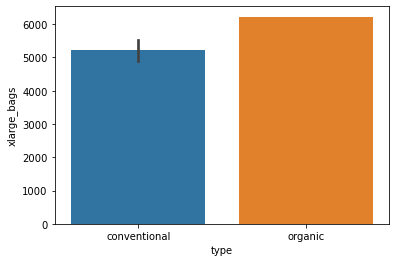

In [161]:
sns.barplot(x='type',y='xlarge_bags', data=year_2015)

In [154]:
#Lets look at the count, sum and average for extra large organic avocado bags.
print('The count for extra large organic avocado bags in 2015 is ',organic2015['xlarge_bags'].count())
print('There was a total of ',organic2015['xlarge_bags'].sum(),' extra large bags sold in 2015')
print('The average amount of extra large avocado bags sold in 2015 is ',organic2015['xlarge_bags'].mean())

The count for extra large organic avocado bags in 2015 is  2807
There was a total of  17467167.044711065  extra large bags sold in 2015
The average amount of extra large avocado bags sold in 2015 is  6222.717151660475


In [156]:
#Lets look at the count, sum and average for extra large conventional avocado bags.
print('The count for extra large conventional avocado bags in 2015 is ',conventional2015['xlarge_bags'].count())
print('There was a total of ',conventional2015['xlarge_bags'].sum(),' extra large bags sold in 2015 for conventional avocados.')
print('The average amount of extra large avocado bags sold in 2015 is ',conventional2015['xlarge_bags'].mean())

The count for extra large conventional avocado bags in 2015 is  2808
There was a total of  14634081.513002582  extra large bags sold in 2015 for conventional avocados.
The average amount of extra large avocado bags sold in 2015 is  5211.567490385512


# Extra large choropleth?? work in progress

In [144]:
data=dict(type='choropleth',
         locationmode='USA-states',
         locations=['geogrphy'],
         z=['xlarge_bags'],
         colorbar={'title':'Extra Large Bags'})

In [145]:
layout=dict(title='Extra Large Bags',
           geo=dict(scope='usa'))

In [146]:
xlchoro=go.Figure(data=[data],layout=layout)
iplot(xlchoro)